# GRIP @ The Sparks Foundation

# SAVITA BALABHADRAPATRUNI

Task No - 3. Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

This task requires us to analytically conclude- As a business manager, try to find out the weak areas where you can work to
make more profit.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Filter all the warnings

import warnings

#Ignoring the warning messages

warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment=None

In [3]:
df = pd.read_csv('SampleSuperstore.csv')

In [4]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [6]:
df.shape

(9994, 13)

In [7]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

**Find the number of duplicate rows and drop them off the dataframe**

In [8]:
df.duplicated().sum()

17

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
#shape after dropping off duplicates

df.shape

(9977, 13)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


In [12]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


In [13]:
#Unique value count in each column

for col in df.columns:
    if df[col].dtype=='object':
        print ('Unique count in' , col , 'is' , df[col].nunique())

Unique count in Ship Mode is 4
Unique count in Segment is 3
Unique count in Country is 1
Unique count in City is 531
Unique count in State is 49
Unique count in Region is 4
Unique count in Category is 3
Unique count in Sub-Category is 17


In [14]:
correlation = df.corr()
correlation

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


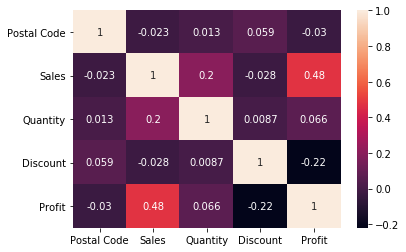

In [15]:
sns.heatmap(correlation, annot = True)

**From the above correlation; it can be observed that Postal Code has null / NO correlation with any of the features. Hence can be dropped off from the dataframe**

**Similarly there is only one country in the whole dataset. so, country column can also be dropped off as it does not affect the profits/sales**

In [16]:
df.drop(['Country'],axis=1,inplace=True)
df.drop(['Postal Code'],axis=1,inplace=True)

In [17]:
correlation = df.corr()
correlation

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


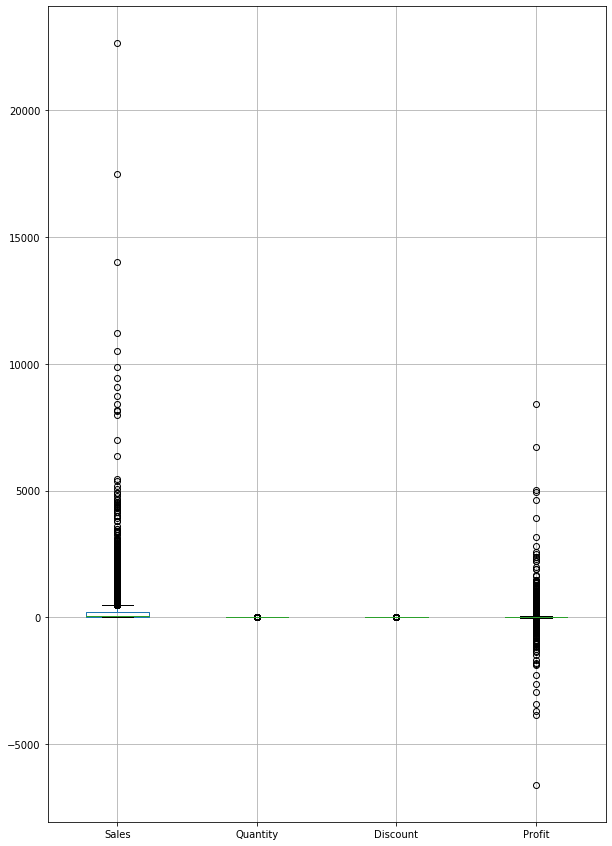

In [18]:
#Outlier analysis using Box Plot

df.boxplot(figsize=(10,15))
plt.show()

**It can be clearly seen that Sales and Profit have outlier values in them**

**REMOVAL OF OUTLIERS**

In [19]:
#Calculate the IQR

df_iqr = df
Q1 = df_iqr.quantile(0.25)
Q3 = df_iqr.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Sales       192.6700
Quantity      3.0000
Discount      0.2000
Profit       27.6458
dtype: float64


In [20]:
#Remove the outliers using the IQR score

df_out = df_iqr[~((df_iqr < (Q1 - 1.5 * IQR)) |(df_iqr > (Q3 + 1.5 * IQR))).any(axis=1)]

print("The no. of rows before outlier filtering was: ", df_iqr.shape)
print("The no. of rows after outlier filtering is: ", df_out.shape)

The no. of rows before outlier filtering was:  (9977, 11)
The no. of rows after outlier filtering is:  (7127, 11)


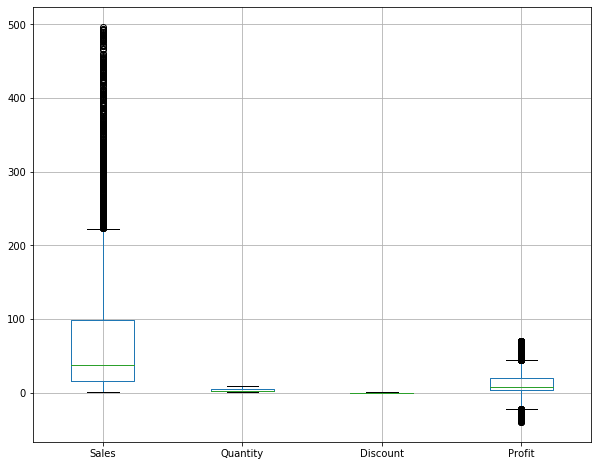

In [21]:
#Box Plot after removal of outliers

df_out.boxplot(figsize=(10,8))
plt.show()

**We can now proceed with EDA**

In [22]:
df_out.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.960,2,0.0,41.9136
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.620,2,0.0,6.8714
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.368,2,0.2,2.5164
5,Standard Class,Consumer,Los Angeles,California,West,Furniture,Furnishings,48.860,7,0.0,14.1694
6,Standard Class,Consumer,Los Angeles,California,West,Office Supplies,Art,7.280,4,0.0,1.9656


In [23]:
df_out.describe()

,Sales,Quantity,Discount,Profit
count,7127.000000,7127.000000,7127.000000,7127.000000
mean,75.736720,3.407745,0.096805,13.008233
std,92.175172,1.880857,0.106368,17.200106
min,0.990000,1.000000,0.000000,-39.637000
25%,15.552000,2.000000,0.000000,3.239200
50%,37.880000,3.000000,0.000000,8.299200
75%,98.426000,5.000000,0.200000,19.627650
max,496.860000,9.000000,0.500000,70.722000


In [24]:
#Unique value count in each column

for col in df_out.columns:
    if df_out[col].dtype=='object':
        print ('Unique count in' , col , 'is' , df_out[col].nunique())

Unique count in Ship Mode is 4
Unique count in Segment is 3
Unique count in City is 508
Unique count in State is 48
Unique count in Region is 4
Unique count in Category is 3
Unique count in Sub-Category is 17


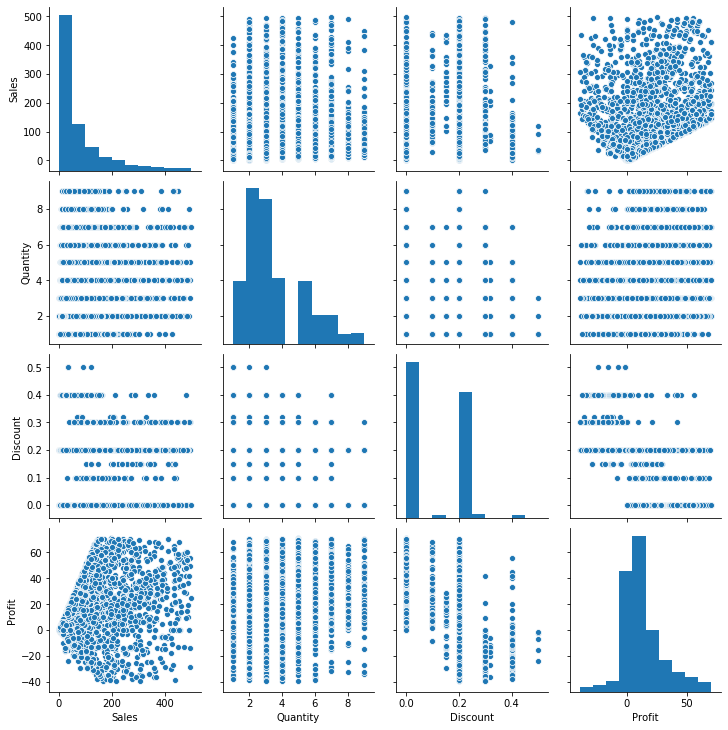

In [25]:
sns.pairplot(df_out)

In [26]:
citysales_grp=df_out.groupby(['City'])['Sales'].mean().sort_values(ascending=False)

citysales_grp.head()

City
Whittier       444.768
El Cajon       432.808
Des Plaines    403.978
Orland Park    339.960
Redding        333.576
Name: Sales, dtype: float64

In [27]:
cityprof_grp=df_out.groupby(['City'])['Profit'].mean().sort_values(ascending=False)

cityprof_grp.head()

City
Orland Park    67.9920
Beverly        66.6272
Mishawaka      64.2000
San Gabriel    63.6825
Pico Rivera    62.7370
Name: Profit, dtype: float64

In [28]:
citydisc_grp=df_out.groupby(['City'])['Discount'].mean().sort_values(ascending=False)

citydisc_grp.head()

City
Medina        0.32
San Angelo    0.30
Pharr         0.30
Texas City    0.30
York          0.25
Name: Discount, dtype: float64

It can be observed from above that average Sales in Whittier is highest but average Profit in Orland Park is highest! However discount averages show a different trend. Something to think about.

In [29]:
statesales_grp=df_out.groupby(['State'])['Sales'].mean().sort_values(ascending=False)

statesales_grp.head()

State
Idaho             122.350889
New Hampshire      98.117143
Oregon             92.108465
Arizona            87.471340
South Carolina     86.901471
Name: Sales, dtype: float64

In [30]:
stateprof_grp=df_out.groupby(['State'])['Profit'].mean().sort_values(ascending=False)

stateprof_grp.head()

State
Vermont          26.279617
New Hampshire    25.935671
Nevada           24.192230
West Virginia    21.716800
Maryland         20.975454
Name: Profit, dtype: float64

In [31]:
statedisc_grp=df_out.groupby(['State'])['Discount'].mean().sort_values(ascending=False)

statedisc_grp.head()

State
Pennsylvania    0.224119
Ohio            0.221967
Texas           0.211115
Illinois        0.209274
Tennessee       0.205185
Name: Discount, dtype: float64

We can observe from the above that Average Sales in Idaho is highest whereas Vermont is topping in avg Profit irrespective of discounts provided!

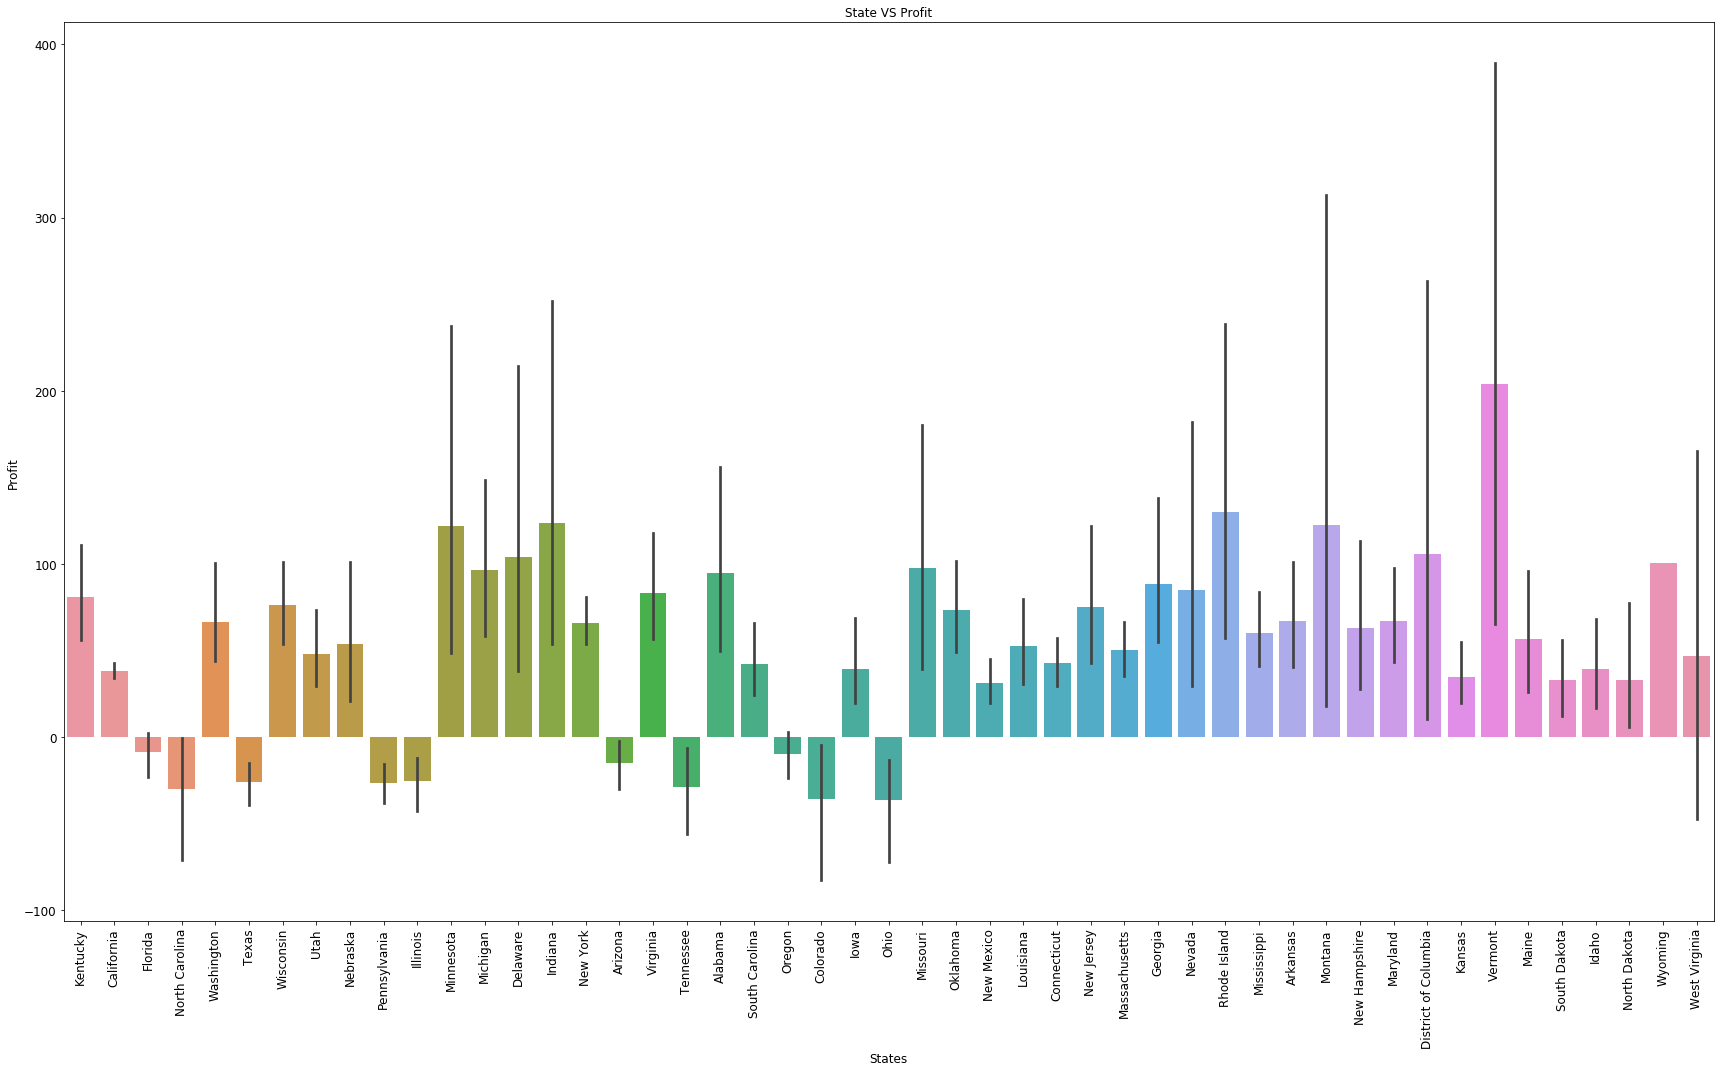

In [35]:
#Profits in states

plt.figure(figsize = [24, 15])
ax = sns.barplot(x = 'State', y = 'Profit', data  = df)
plt.xticks(rotation = 90, fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("State VS Profit", fontsize = 12)
plt.xlabel("States", fontsize = 12)
plt.ylabel("Profit", fontsize = 12)
plt.tight_layout()

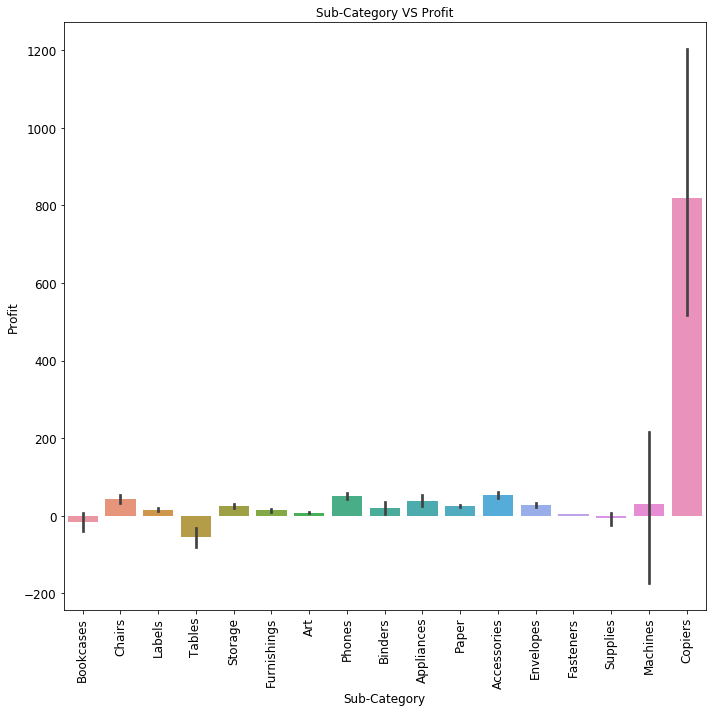

In [61]:
#Profit VS Sub-Category

plt.figure(figsize = [10,10])
ax = sns.barplot(x = 'Sub-Category', y = 'Profit', data  = df)
plt.xticks(rotation = 90, fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Sub-Category VS Profit", fontsize = 12)
plt.xlabel("Sub-Category", fontsize = 12)
plt.ylabel("Profit", fontsize = 12)
plt.tight_layout()

As from above; it can be observed that copiers earn the most profits whereas tables, supplies and machines are in loss.

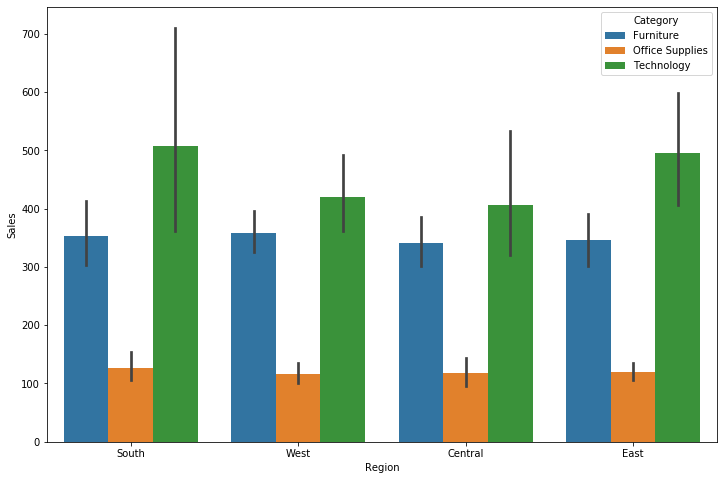

In [34]:
#Category wise Sales in Each Region
plt.figure(figsize = [12,8])
ax = sns.barplot(x = "Region", y = "Sales", hue = "Category", data = df)

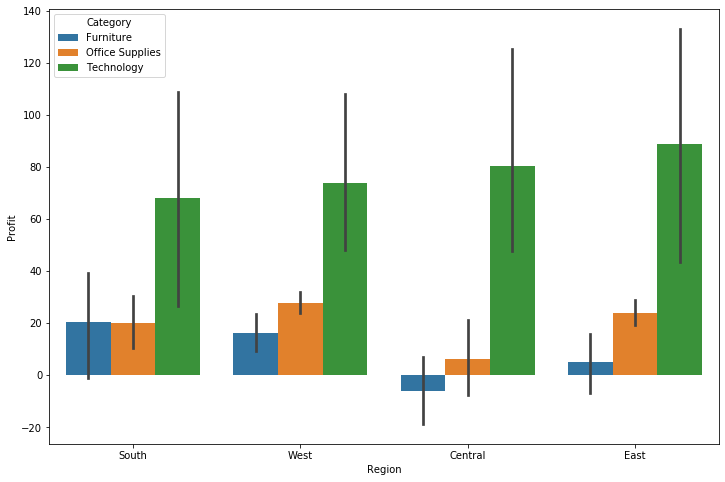

In [36]:
#Category wise Profit in Each Region

plt.figure(figsize = [12,8])
ax = sns.barplot(x = "Region", y = "Profit", hue = "Category", data = df)

As from above; it can be observed that 
1. Sales and Profits for Technology has a good stand in all regions. 
2. Furniture sales are constant but attains less profits overall - and losses for the same have occured in Central region - Something to analyse about.
3. Office supplies sales are constant too but profits are minimal - Something to think about

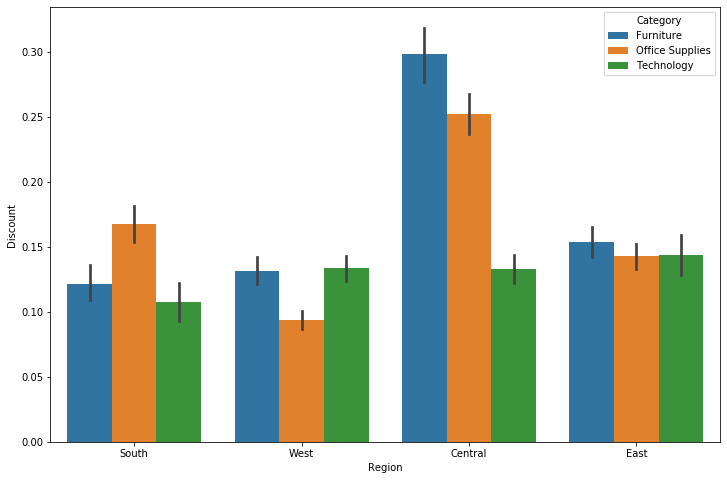

In [37]:
#Category wise Discounts in Each Region
plt.figure(figsize = [12,8])
ax = sns.barplot(x = "Region", y = "Discount", hue = "Category", data = df)

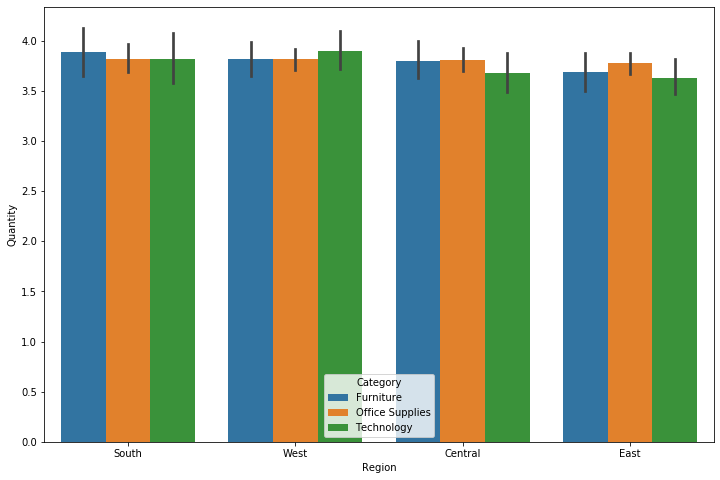

In [38]:
#Category wise quantity sold in Each Region
plt.figure(figsize = [12,8])
ax = sns.barplot(x = "Region", y = "Quantity", hue = "Category", data = df)

**1. Quantity sold remains almost constant for all categories in all regions.**

**2. The losses in Furniture in Central and East might be due to heavy discounts applicable on them. Reducing the discounts might help boost up the Profits in those regions**

With the above analysis; it can be said that Dicounts are playing a major role on profits. As seen above; the quantity being sold remain constant for all categories for all regions. The Profits and losses are dependent on Discount rates. Some cities provide no discounts and have highest sales. If discounts are altered; the sales will boost and profits will be acquired.

**THANK YOU!**